**STRATHMORE UNIVERSITY**  
**COURSE: DSA8203_PRINCIPLES OF DATA SCIENCE**    
**NAME: JOB ZABLON**  
**REG: 193314**  
**DATE: 14/11/2024**  
**CAT 1**


**Introduction**

The [dataset](https://data.iita.org/dataset/grain-yield-and-other-agronomic-traits-of-international-maize-trials-mali) contains maize trial data for Mali, with a variety of features, though some columns have missing values. Some key columns with data include:

**Yield (YIELD)**: Maize yield values.  
**Environmental variables:** Longitude, Latitude.  
**Growth characteristics:** Day to silk (DY_SK), Ear aspect (E_ASP), Harvest index (E_HARV), and Plant height (PL_HT).      
**Other traits:** Husk tightness (HUSK), Moisture content (MOIST).

Thus the potential research questions that can be explored here include:

1.What environmental and plant traits best predict maize yield in this trial?    
2.Is there a correlation between plant height, ear aspect, and yield in different maize entries?  
3.Does the location (longitude/latitude) affect the growth characteristics and yield of the maize entries?  
4.What is the impact of moisture content on the yield of various maize varieties?

Objectives  
We visualize data to enquire the relationship between “YIELD” and other variables.

Determine which variables to be used in success prediction model

Importing Libralies

In [ ]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [ ]:
#Import and reading dataset into pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/j-zab/DSA_Principles_of_DS/main/international_maize_trial_regular_mali.csv')

In [ ]:
#printing the first 5 rows of the dataset
df.head()

,ID,TRL_TITL,TRIAL_ID,ENTRYNO,ENTRY,COUNTRY,LOCATION,DESCRIPTION,LONGITUDE,LATITUDE,...,INSECT,MOIST,COBDAMCO,COBDAMRT,DEADHEART,SBDAMAT,BORERDMRAT,GLS,GTEXT,PLST
0,1,Evt-Isr (White),M9003ST,1,ACR 87 TZUT SR W,MALI,SOTUBA,NaN,-7.95,12.67,...,NaN,12.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.50
1,2,Evt-Isr (White),M9003ST,2,EV 8444 SR BC4,MALI,SOTUBA,NaN,-7.95,12.67,...,NaN,12.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.50
2,3,Evt-Isr (White),M9003ST,3,EV 8749 SR BC6,MALI,SOTUBA,NaN,-7.95,12.67,...,NaN,9.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.25
3,4,Evt-Isr (White),M9003ST,4,EV 8762 SR BC6,MALI,SOTUBA,NaN,-7.95,12.67,...,NaN,16.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.00
4,5,Evt-Isr (White),M9003ST,5,EV 8766 SR BC6,MALI,SOTUBA,NaN,-7.95,12.67,...,NaN,18.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.75


**Exploratory Data Analysis**

Cheking the column names on the data set

In [ ]:
df.columns

Index(['ID', 'TRL_TITL', 'TRIAL_ID', 'ENTRYNO', 'ENTRY', 'COUNTRY', 'LOCATION',
       'DESCRIPTION', 'LONGITUDE', 'LATITUDE', 'AEZONE', 'YEAR', 'YIELD',
       'YIELD2', 'DY_SK', 'PL_HT', 'E_HT', 'ASI', 'P_ASP', 'P_HARV', 'E_HARV',
       'E_ASP', 'GWT', '1000GWT', 'HUSK', 'RL', 'RLPER', 'SL', 'SLPER',
       'E_ROT', 'RUST', 'BLIGHT', 'CURV', 'DIPLODIA', 'DM', 'ANTHESIS',
       'STALK_ROT', 'STREAK', 'INSECT', 'MOIST', 'COBDAMCO', 'COBDAMRT',
       'DEADHEART', 'SBDAMAT', 'BORERDMRAT', 'GLS', 'GTEXT', 'PLST'],
      dtype='object')

To show number of rows and columns

In [ ]:
df.shape

(1292, 48)

Showing the Data Types

In [ ]:
df.dtypes

,0
ID,int64
TRL_TITL,object
TRIAL_ID,object
ENTRYNO,int64
ENTRY,object
COUNTRY,object
LOCATION,object
DESCRIPTION,float64
LONGITUDE,float64
LATITUDE,float64


Showing the data types, missing values, columns and rows, memory usage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1292 non-null   int64  
 1   TRL_TITL     1292 non-null   object 
 2   TRIAL_ID     1292 non-null   object 
 3   ENTRYNO      1292 non-null   int64  
 4   ENTRY        1292 non-null   object 
 5   COUNTRY      1292 non-null   object 
 6   LOCATION     1292 non-null   object 
 7   DESCRIPTION  0 non-null      float64
 8   LONGITUDE    1292 non-null   float64
 9   LATITUDE     1292 non-null   float64
 10  AEZONE       895 non-null    object 
 11  YEAR         1292 non-null   int64  
 12  YIELD        1218 non-null   float64
 13  YIELD2       0 non-null      float64
 14  DY_SK        1165 non-null   float64
 15  PL_HT        1147 non-null   float64
 16  E_HT         1148 non-null   float64
 17  ASI          852 non-null    float64
 18  P_ASP        1272 non-null   float64
 19  P_HARV

Examining the summary statistics of the dataframe's numeric columns.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1292.0,646.500000,373.112584,1.00,323.7500,646.500,969.2500,1292.00
ENTRYNO,1292.0,8.907895,6.181231,1.00,4.0000,8.000,12.0000,30.00
DESCRIPTION,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUDE,1292.0,-7.874613,1.164314,-9.48,-8.1500,-7.950,-7.0300,-5.51
LATITUDE,1292.0,11.852632,0.917874,10.47,11.2700,12.390,12.6700,13.08
YEAR,1292.0,2007.202786,6.606036,1990.00,2000.0000,2008.000,2015.0000,2015.00
YIELD,1218.0,3550.444754,1626.390719,0.00,2430.5825,3527.405,4588.4850,8323.00
YIELD2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DY_SK,1165.0,62.339597,5.751860,0.00,59.2500,62.000,66.0000,82.50
PL_HT,1147.0,172.308413,29.554081,43.50,154.0500,168.000,190.0000,278.00


Subsetting of Variables of intrest to df2

In [ ]:
#Subseting key variables to data frame
df2=df[['YIELD','E_HT','PL_HT','MOIST','E_ASP','HUSK','E_HARV']]
df2.head()

,YIELD,E_HT,PL_HT,MOIST,E_ASP,HUSK,E_HARV
0,4101.21,104.75,195.75,12.200,1.00,NaN,33.50
1,4497.07,101.50,181.50,12.350,1.25,NaN,30.50
2,3274.56,89.00,181.75,9.125,1.25,NaN,31.00
3,3907.70,99.25,176.75,16.525,1.25,NaN,34.75
4,3193.66,112.25,194.50,18.725,1.25,NaN,30.50


In [ ]:
#checking null values on the subset
df2.isnull().sum()

,0
YIELD,74
E_HT,144
PL_HT,145
MOIST,254
E_ASP,27
HUSK,58
E_HARV,813


Data Cleaning

In [ ]:
# #impute null values with  mean on each column
# df2.fillna(df2.mean(), inplace=True)

In [ ]:
# #check null values after imputation
# df2.isnull().sum()

**CAT QUESTIONS:**

**1. Is there an example of an outlier in your data that surprised you? Why?
Outliers can be identified using boxplots and numerical methods such as the interquartile range (IQR).**

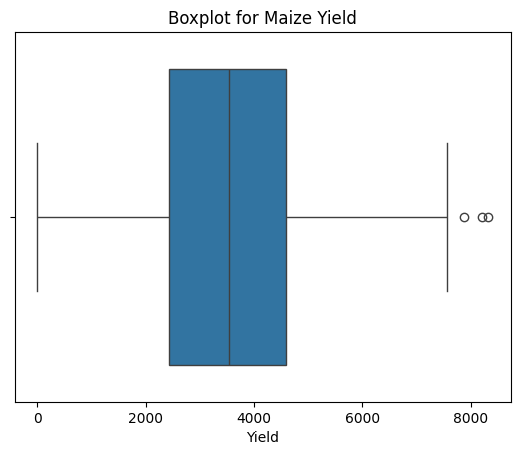

Number of outliers: 3
Outliers:
      YIELD  E_HT  PL_HT  MOIST  E_ASP  HUSK  E_HARV
665  8210.0   NaN    NaN    NaN    1.3   2.0     NaN
815  7883.0  86.0  178.7   15.1    1.7   1.3     NaN
950  8323.0  79.0  175.0   17.3    1.3   1.7     NaN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers in Yield
sns.boxplot(x=df2['YIELD'])
plt.title("Boxplot for Maize Yield")
plt.xlabel("Yield")
plt.show()

# Detect outliers using IQR
Q1 = df['YIELD'].quantile(0.25)
Q3 = df['YIELD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df2[(df2['YIELD'] < lower_bound) | (df['YIELD'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print("Outliers:")
print(outliers)


**Outliers:**

Yes, the maize yield data points beyond the whiskers, represented as circles, are outliers. These outliers (yields above 8000) could be due to high-performing maize varieties, experimental anomalies, or errors.
These outliers require further investigation to determine if they are legitimate or need to be excluded.

**2. Look at some of the histograms for your data? How would you explain one of them to someone unfamiliar with your data?**

Using histogram to visualize the distribution of key numerical columns,"YIELD"

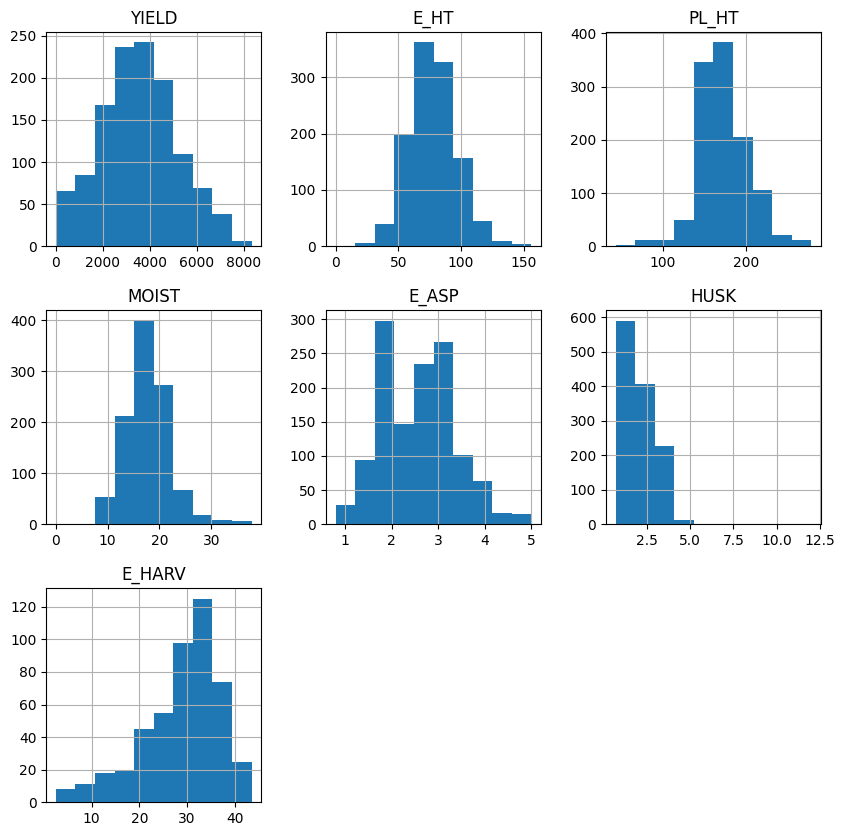

In [ ]:
#Histogram for key variables of intrest on df2
df2.hist(figsize=(10, 10))
plt.show()

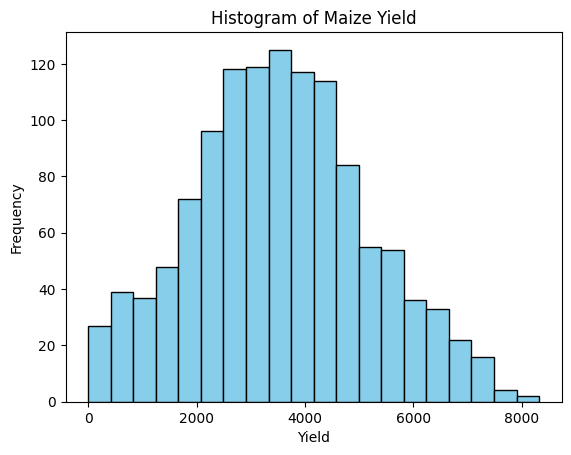

In [ ]:
# Histogram for Yield
plt.hist(df['YIELD'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Maize Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()


**Maize Yied Histogram Interpretation**

**Shape of Distribution:**

The data appears approximately normally distributed, with most values clustered around the mean yield (approximately 4000 units).
There is slight skewness towards the right (positive skew), indicating a few higher-than-average yields.

**Frequency:**

The most frequent yield range is between 3000–5000, with over 120 trials achieving yields in this range.
Yields below 1000 and above 7000 are less frequent.

**Outliers:**

There are potential outliers on the far right (yields exceeding 8000), suggesting extremely high-performing entries or data anomalies.
Similarly, very low yields near zero might represent failed trials or missing data recorded as zero.

**Implications:**

The histogram suggests that most maize varieties perform within a standard range of yields, with only a few varieties or conditions causing deviations.
This pattern may result from genetic factors, environmental conditions, or experimental errors. Further analysis can help identify causes for outliers and clusters.

**3. Is there a relationship between two columns of your data that you didn't expect? How would you explain it?**

We can use scatter plots to visualize relationships between two variables. Here, we'll examine the relationship between `MOIST` and `E_ASP`

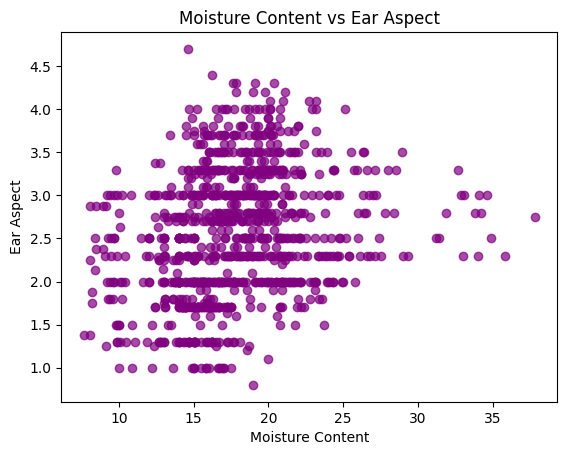

Correlation between MOIST and E_ASP: 0.2627200849184808


In [ ]:
# Scatter plot for MOIST vs E_ASP
plt.scatter(df['MOIST'], df2['E_ASP'], alpha=0.7, color='purple')
plt.title("Moisture Content vs Ear Aspect")
plt.xlabel("Moisture Content")
plt.ylabel("Ear Aspect")
plt.show()

# Correlation coefficient
correlation = df2[['MOIST', 'E_ASP']].corr().iloc[0, 1]
print(f"Correlation between MOIST and E_ASP: {correlation}")


from the above scatter :

There appears to be a positive correlation between moisture content and ear aspect. As moisture content increases, the ear aspect also tends to increase slightly, though the relationship is not very strong

correlation matrix

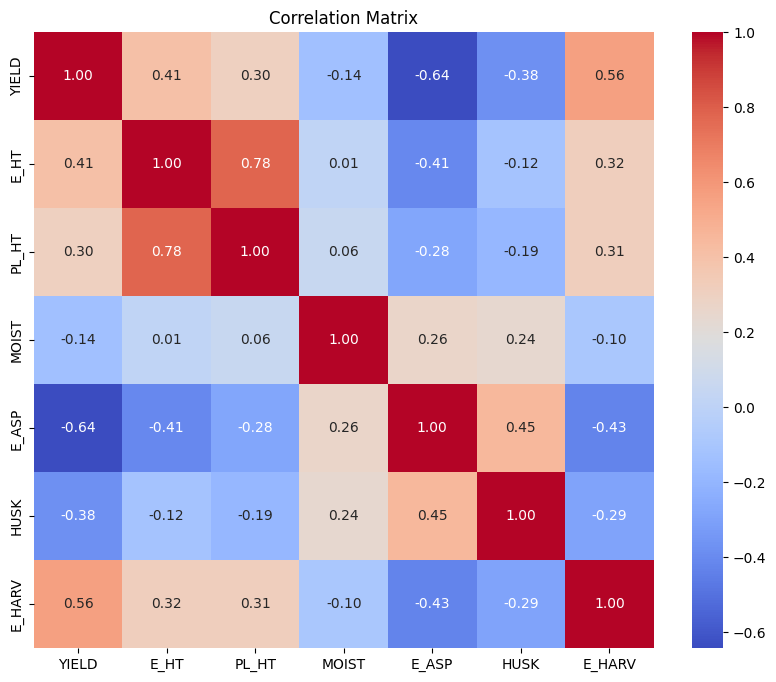

In [ ]:
#correraltion matrix for df2 key variables of intrest
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

I dint expect multicollinearity relationships among the predictor variables predicting the outcome variable(YIELD)

for instance:
E_HT(Ear Height) has Strong positive correlation with PL_HT(plant height) (0.78), suggesting these two may be strongly related or influenced by similar factors.

**4. Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights. Why?**

Some of the organizations which may be intrested in my insights from thiss data set include:

1. Agricultural Research Institutes (e.g., International Maize and Wheat Improvement Center - CIMMYT): They would use insights to identify high-performing maize varieties and optimize breeding programs.  
2. Governmental Agricultural Agencies (e.g., Ministry of Agriculture, Mali): They could utilize findings to recommend varieties to farmers in regions with specific environmental conditions.  
3. Seed Companies (e.g., Monsanto, Syngenta): Insights about traits influencing yield would help them market improved seed varieties.


**5. What cleanup was required in your dataset? Determine how to handle the missing values for your dataset.**

Handling missing values includes dropping columns/rows or imputing values.

In [ ]:
# Handle missing values
missing_summary = df2.isnull().sum()
print("Missing Values Per Column:")
print(missing_summary)

Missing Values Per Column:
YIELD      74
E_HT      144
PL_HT     145
MOIST     254
E_ASP      27
HUSK       58
E_HARV    813
dtype: int64


In [ ]:
# Drop columns with >80% missing values
threshold = 0.8 * len(df2)
columns_to_drop = df2.columns[df2.isnull().mean() > 0.8]
maize_data_cleaned = df2.drop(columns=columns_to_drop)
maize_data_cleaned.head()

,YIELD,E_HT,PL_HT,MOIST,E_ASP,HUSK,E_HARV
0,4101.21,104.75,195.75,12.200,1.00,NaN,33.50
1,4497.07,101.50,181.50,12.350,1.25,NaN,30.50
2,3274.56,89.00,181.75,9.125,1.25,NaN,31.00
3,3907.70,99.25,176.75,16.525,1.25,NaN,34.75
4,3193.66,112.25,194.50,18.725,1.25,NaN,30.50


In [ ]:
# Impute missing numerical columns with median
numerical_cols = ['YIELD', 'E_HT', 'PL_HT', 'MOIST', 'E_ASP','HUSK','E_HARV']
for col in numerical_cols:
    if col in maize_data_cleaned.columns:
        maize_data_cleaned[col].fillna(maize_data_cleaned[col].median(), inplace=True)

# Verify missing values
print("Missing Values After Cleaning:")
print(maize_data_cleaned.isnull().sum())


Missing Values After Cleaning:
YIELD     0
E_HT      0
PL_HT     0
MOIST     0
E_ASP     0
HUSK      0
E_HARV    0
dtype: int64


<ipython-input-101-8fe15637bee8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  maize_data_cleaned[col].fillna(maize_data_cleaned[col].median(), inplace=True)


**6. Create a function that accepts the raw data and returns the cleaned-up data.**

Here’s the function to encapsulate the cleaning process.

In [ ]:
def clean_maize_data(raw_data):
    # Drop columns with >80% missing values
    threshold = 0.8 * len(raw_data)
    data_cleaned = raw_data.dropna(thresh=threshold, axis=1)

    # Impute missing values with median
    numerical_cols = ['YIELD', 'E_HT', 'PL_HT', 'MOIST', 'E_ASP','DY_SK','HUSK','E_HARV']
    for col in numerical_cols:
        if col in data_cleaned.columns:
            data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

    # Drop duplicates
    data_cleaned = data_cleaned.drop_duplicates()

    return data_cleaned


**Bonus: What’s one question you would have asked that is not included, and how would you answer it?**

**Question: What is the spatial distribution of high-yield maize varieties?**

Answer: Use a scatter plot with Latitude and Longitude to map yields.

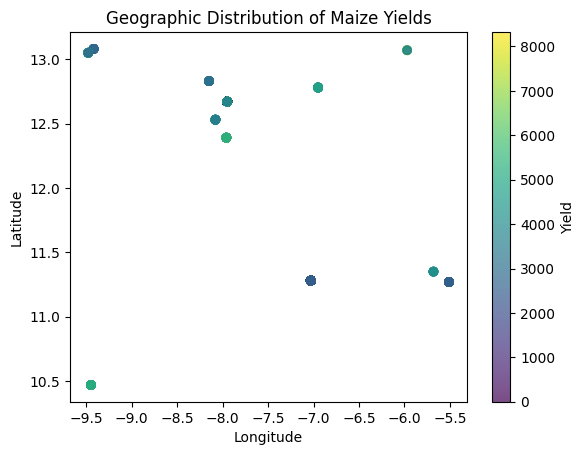

In [ ]:
# Scatter plot for yield distribution on geographic map
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['YIELD'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Yield')
plt.title("Geographic Distribution of Maize Yields")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


This scatter plot illustrates the geographic distribution of maize yields, with data points plotted based on their latitude and longitude. The color of each point represents the yield value, with a color bar on the right showing the yield scale from low (purple) to high (yellow-green).

**Key Observations:**  
Yield Variation: Higher yields (lighter colors, closer to yellow-green) are found in some specific locations, whereas other areas exhibit lower yields (darker colors, closer to purple).
Geographic Spread: The data spans latitudes from around 10.5 to 13.0 and longitudes from -9.5 to -5.5, indicating the maize yields cover a wide geographic area.
Clusters: There are clusters of points, suggesting regions with similar yield levels that may share environmental or agricultural practices.

**PART II:**

Watch the video on  [Discussion Analytics to AI](https://www.youtube.com/watch?v=gZk9wJv4yCU).  
**In two to three sentences (include them in your Colab notebook) highlight your biggest take away from the video.**


**Key Take Aways:**

1.AI surpasses traditional analytics by offering enhanced decision-making capabilities through advanced modeling and learning algorithms.   
2.Aligning AI initiatives with clear objectives and values ensures meaningful integration and measurable outcomes for organizations.  
3.The journey of AI adoption includes leveraging AI agents effectively and prioritizing ongoing professional development to keep teams updated with evolving technologies.